In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import Observer
from astroplan import time_grid_from_range
from astroplan.plots import plot_airmass

The best season for observing M31 is in the Autumn, since RA for M31 is ~1hr, which is Springtime (according to the ecliptic).

In [65]:
APO=Observer.at_site("APO")

In [66]:
date=Time("2019-04-16")
date

<Time object: scale='utc' format='iso' value=2019-04-16 00:00:00.000>

In [69]:
#Astronomical twilight is when the Sun is 18 degrees below the horizon

#Observations begin at twilight_evening_astronomical
astro_set = APO.twilight_evening_astronomical(date, which='nearest')

#Observations end at twilight_moring_astronomical
astro_rise = APO.twilight_morning_astronomical(date, which='next')

print(astro_set.iso)
print(astro_rise.iso)
print(
"""
The amount (in hours) of observing time at APO on April 16 2019 is {0:.2f}
""".format((astro_rise-astro_set).to(u.hr))
)

2019-04-16 02:59:43.579
2019-04-16 11:06:18.952

The amount (in hours) of observing time at APO on April 16 2019 is 8.11 h



In [70]:
M31=FixedTarget.from_name("m31")

In [71]:
M31.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68470833, 41.26875)>

In [72]:
date_2=Time("2019-12-31")
date_2

<Time object: scale='utc' format='iso' value=2019-12-31 00:00:00.000>

In [73]:
moon=get_body('moon', date_2)
print(moon)

<SkyCoord (GCRS: obstime=2019-12-31 00:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km)
    (337.42806413, -14.15183661, 401959.27256324)>


In [74]:
moon_ratio=moon_illumination(date_2)

In [75]:
illumoonati=moon_ratio*(100)
illumoonati

21.625726075476905

In [76]:
print(
"""
The moon will be in its waxing crescent phase and affect observations somewhat,\nit will be at {0:.2f}% of it's full moon illumination
""".format(illumoonati)
)


The moon will be in its waxing crescent phase and affect observations somewhat,
it will be at 21.63% of it's full moon illumination



In [77]:
APO.target_is_up(date_2, M31) 

True

2019-12-31 01:34:32.621
2019-12-31 12:37:26.788

The amount (in hours) of observing time at APO on December 31 2019 is 11.05 h



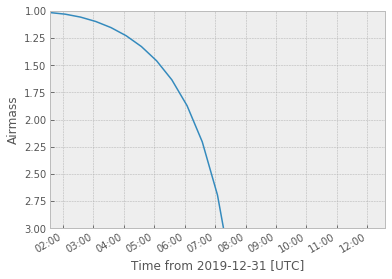

In [80]:
astro_set_2=APO.twilight_evening_astronomical(date_2, which='nearest')
astro_rise_2=APO.twilight_morning_astronomical(date_2, which='next')

print(astro_set_2.iso)
print(astro_rise_2.iso)
print(
"""
The amount (in hours) of observing time at APO on December 31 2019 is {0:.2f}
""".format((astro_rise_2-astro_set_2).to(u.hr))
)

start_time=astro_set_2
end_time=astro_rise_2

observing_range=[astro_set_2, astro_rise_2]

time_grid=time_grid_from_range(observing_range)

plt.style.use('bmh')
plot_airmass(M31, APO, time_grid);